Se trabajara con la base de datos de IMDB, la cual contiene reviews de peliculas y se busca clasificar esos reviews en positivos o negativos.

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

### Carga de datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape # Hay 25.000 registros

(25000,)

In [4]:
train_data[0] # Keras ya trae las palabras tokenizadas

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels # Valores binarios entre 1 y 0 (sentimientos)

array([1, 0, 0, ..., 0, 1, 0])

### Preprocesamiento

In [6]:
# Diccionario palabras y token

word_index = imdb.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
word_index

1641221/1641221 [==============================] - 0s 0us/step


{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
# Ver las palabras
for _ in train_data[0]:
    print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

__**Keras solo recibe tensores numpy en formato float__

### Vectorizar palabras

In [8]:
def vectorizar(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [9]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Estructuración de modelo con una red secuencial

Binary-cross entrophy es la función de perdida recomendada para modelos de clasificación

In [28]:
model = models.Sequential() #Creación del modelo
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
# Creación de capa con 16 neuronas, activación relu y 10.000 datos de entrada

# Se crean otras 2 neuronas
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [29]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy') # rmsprop es una versión mejorada del descenso de gradiente.

## Entrenamiento

In [30]:
x_val = x_train[:10000] # datos de validación
partial_x_train = x_train[10000:]

y_val = y_train[:10000] # datos de validación
partial_y_train = y_train[10000:]

In [31]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

# Entrenar el modelo en 4 iteracciones en lotes que tengan 512 registros, haciendo a la vez la validacion

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5144 - accuracy: 0.7821 - val_loss: 0.4065 - val_accuracy: 0.8463
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3213 - accuracy: 0.8915 - val_loss: 0.3359 - val_accuracy: 0.8679
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2434 - accuracy: 0.9199 - val_loss: 0.2818 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1982 - accuracy: 0.9353 - val_loss: 0.2793 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1657 - accuracy: 0.9462 - val_loss: 0.2849 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1403 - accuracy: 0.9557 - val_loss: 0.2803 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1201 - accuracy: 0.9612 - val_loss: 0.2907 - val_accuracy: 0.8860
Epoch 8/20
30

## Graficar epocas

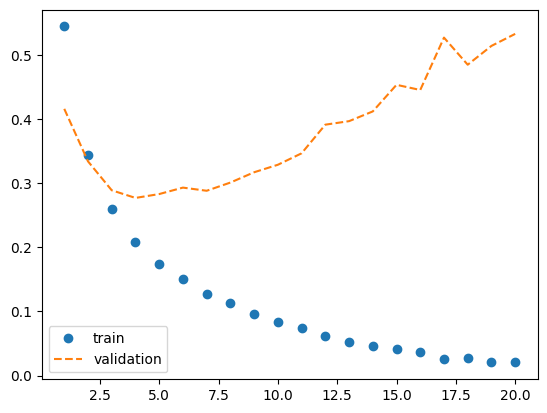

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values)+1)

plt.plot(epoch, loss_values, 'o', label = 'train')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

Se observa que en la funcion de perdida de train itero muy rapido y llego a un valor bajo de una manera muy eficiente.

Por otro lado, en validation se estanca, por lo que posiblemente hay overfitting. Esto se sabe porque la dirección de validation y train no es la misma.

In [16]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.2987 - accuracy: 0.8816


[0.29865309596061707, 0.8816400170326233]

## Ajuste del modelo (Fine tunning)

### Modelo menos complejo

In [36]:
model2 = models.Sequential() #Creación del modelo
model2.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
# Creación de capa con 16 neuronas, activación relu y 10.000 datos de entrada

# Se crean otras 2 neuronas
model2.add(layers.Dense(4, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [37]:
model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy') # rmsprop es una versión mejorada del descenso de gradiente.

In [38]:
history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

# Entrenar el modelo en 4 iteracciones en lotes que tengan 512 registros, haciendo a la vez la validacion

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.6262 - accuracy: 0.6704 - val_loss: 0.5720 - val_accuracy: 0.7890
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5304 - accuracy: 0.8087 - val_loss: 0.5422 - val_accuracy: 0.7297
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4738 - accuracy: 0.8645 - val_loss: 0.4738 - val_accuracy: 0.8672
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4118 - accuracy: 0.9067 - val_loss: 0.4253 - val_accuracy: 0.8662
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3485 - accuracy: 0.9273 - val_loss: 0.3812 - val_accuracy: 0.8721
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2923 - accuracy: 0.9401 - val_loss: 0.3375 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2458 - accuracy: 0.9478 - val_loss: 0.3112 - val_accuracy: 0.8880
Epoch 8/20
30

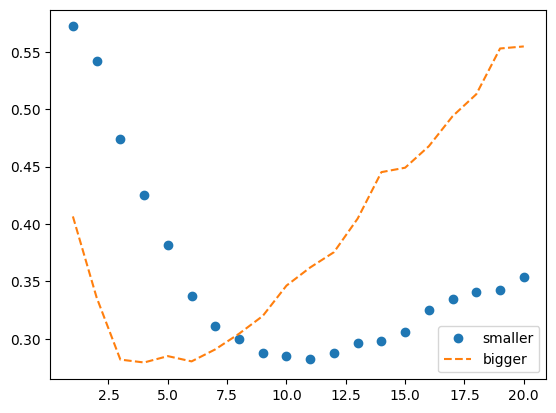

In [39]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values2 = history2.history['val_loss']

epoch = range(1, len(loss_values)+1)

plt.plot(epoch, val_loss_values2, 'o', label = 'smaller')
plt.plot(epoch, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

Se observa que el modelo pequeño tiene mejores resultados y tarda más en llegar al overfitting.

### Regularización

In [40]:
from keras import regularizers

In [41]:
model3 = models.Sequential() #Creación del modelo
model3.add(layers.Dense(4, activation = 'relu', input_shape = (10000,),
                        kernel_regularizer=regularizers.l2(0.001)))
# Creación de capa con 16 neuronas, activación relu y 10.000 datos de entrada.
# Aquí se agrega la regularización tipo l2 con un lambda de 0.001

# Se crean otras 2 neuronas
model3.add(layers.Dense(4, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation = 'sigmoid'))

model3.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy') # rmsprop es una versión mejorada del descenso de gradiente.


history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

# Entrenar el modelo en 20 iteracciones en lotes que tengan 512 registros, haciendo a la vez la validacion

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.6073 - accuracy: 0.7370 - val_loss: 0.5226 - val_accuracy: 0.8469
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4548 - accuracy: 0.8791 - val_loss: 0.4309 - val_accuracy: 0.8639
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3680 - accuracy: 0.9021 - val_loss: 0.3731 - val_accuracy: 0.8802
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3139 - accuracy: 0.9147 - val_loss: 0.3462 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2787 - accuracy: 0.9241 - val_loss: 0.3303 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2540 - accuracy: 0.9313 - val_loss: 0.3187 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2356 - accuracy: 0.9389 - val_loss: 0.3147 - val_accuracy: 0.8893
Epoch 8/20
30

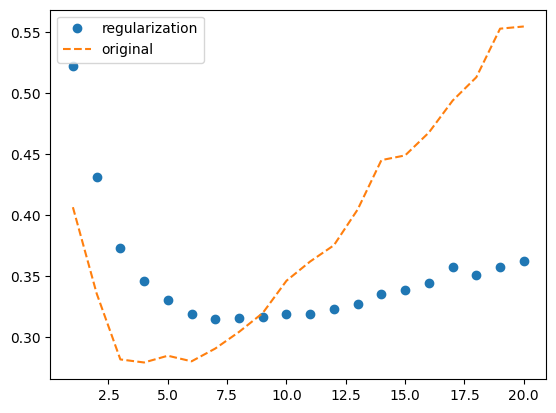

In [42]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values3 = history3.history['val_loss']

epoch = range(1, len(loss_values)+1)

plt.plot(epoch, val_loss_values3, 'o', label = 'regularization')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

### Dropout

Dropout al final es una capa adicional en la red. Esto evita que las capas sean "corruptas" y tiendan al overfitting. En este caso, dado que hay 3 capas en la red neuronal, se deben agregar 2 capas de dropout, pues esto debe quedar escalonado de la siguiente forma:

__Capa de entrada | Capa Dropout | Capa Oculta | Capa Dropout | Capa de salida__

Al agregarse de esta forma además se hace un tipo de regularización.

In [43]:
model4 = models.Sequential() #Creación del modelo
model4.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
# Creación de capa con 16 neuronas, activación relu y 10.000 datos de entrada

# Capa dropout
model4.add(layers.Dropout(0.5)) # Inactivar el 50% de las neuronas en cada iteración capa tras capa

# Se crean otras 2 neuronas
model4.add(layers.Dense(4, activation = 'relu'))

# Capa dropout
model4.add(layers.Dropout(0.5)) # Inactivar el 50% de las neuronas en cada iteración capa tras capa

model4.add(layers.Dense(1, activation = 'sigmoid'))

model4.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy') # rmsprop es una versión mejorada del descenso de gradiente.

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

# Entrenar el modelo en 20 iteracciones en lotes que tengan 512 registros, haciendo a la vez la validacion

Epoch 1/20
30/30 [==============================] - 5s 66ms/step - loss: 0.6870 - accuracy: 0.5449 - val_loss: 0.6502 - val_accuracy: 0.6164
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6582 - accuracy: 0.6026 - val_loss: 0.6292 - val_accuracy: 0.8242
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6345 - accuracy: 0.6425 - val_loss: 0.5805 - val_accuracy: 0.8099
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6169 - accuracy: 0.6618 - val_loss: 0.5531 - val_accuracy: 0.8286
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6013 - accuracy: 0.6807 - val_loss: 0.5468 - val_accuracy: 0.8661
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5851 - accuracy: 0.6994 - val_loss: 0.5339 - val_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5741 - accuracy: 0.7108 - val_loss: 0.5057 - val_accuracy: 0.8732
Epoch 8/20
30

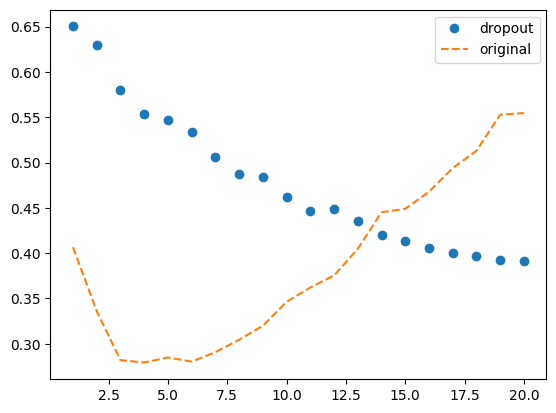

In [44]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values4 = history4.history['val_loss']

epoch = range(1, len(loss_values)+1)

plt.plot(epoch, val_loss_values4, 'o', label = 'dropout')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()